# Data cleaning

In [1]:
# import
import pandas as pd
import numpy as np
import glob

In [2]:
# define a variable to select all the csv files in the Data folder
csv_files = glob.glob('/Users/endikamichelenabanuelos/Desktop/AAU/M6/Semester project/M6_sem_project/Data/*.csv')

# define a df
df = pd.DataFrame()

# loop through the files to create one big df
for file in csv_files:
    temp_df = pd.read_csv(file)
    df = pd.concat([df, temp_df], ignore_index=True)

In [3]:
# check the df
df

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|DK1
0,01.01.2020 00:00 - 01.01.2020 01:00,33.42,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85,EUR,NaN
...,...,...,...,...
35063,31.12.2022 19:00 - 31.12.2022 20:00,67.01,EUR,NaN
35064,31.12.2022 20:00 - 31.12.2022 21:00,40.5,EUR,NaN
35065,31.12.2022 21:00 - 31.12.2022 22:00,14.89,EUR,NaN
35066,31.12.2022 22:00 - 31.12.2022 23:00,9.94,EUR,NaN


In [4]:
# re-define the df only with the interesting features
df = df[['MTU (CET/CEST)','Day-ahead Price [EUR/MWh]']]

In [5]:
# re-nameing the features
df = df.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'Price'})

In [6]:
# check the data
df

,date,Price
0,01.01.2020 00:00 - 01.01.2020 01:00,33.42
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85
...,...,...
35063,31.12.2022 19:00 - 31.12.2022 20:00,67.01
35064,31.12.2022 20:00 - 31.12.2022 21:00,40.5
35065,31.12.2022 21:00 - 31.12.2022 22:00,14.89
35066,31.12.2022 22:00 - 31.12.2022 23:00,9.94


In [7]:

# modify the date column in order to have the start-date only
df['date'] = df['date'].apply(lambda x: x[0:16])

In [8]:
#check the data
df

,date,Price
0,01.01.2020 00:00,33.42
1,01.01.2020 01:00,31.77
2,01.01.2020 02:00,31.57
3,01.01.2020 03:00,31.28
4,01.01.2020 04:00,30.85
...,...,...
35063,31.12.2022 19:00,67.01
35064,31.12.2022 20:00,40.5
35065,31.12.2022 21:00,14.89
35066,31.12.2022 22:00,9.94


In [9]:
# check if there is any duplicated value
df['date'].duplicated().sum()

4

In [10]:
# drop duplicated values
df = df.drop_duplicates(subset='date')

In [11]:
# check the data
df

,date,Price
0,01.01.2020 00:00,33.42
1,01.01.2020 01:00,31.77
2,01.01.2020 02:00,31.57
3,01.01.2020 03:00,31.28
4,01.01.2020 04:00,30.85
...,...,...
35063,31.12.2022 19:00,67.01
35064,31.12.2022 20:00,40.5
35065,31.12.2022 21:00,14.89
35066,31.12.2022 22:00,9.94


# Darts

## Data visualization

In [12]:
# install
pip install darts

SyntaxError: invalid syntax (236091509.py, line 2)

In [ ]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import darts
from darts import TimeSeries

In [ ]:
# create the time_series variable for model building
time_series = TimeSeries.from_dataframe(df, time_col='date', value_cols = 'Price', fill_missing_dates=True, freq=None)

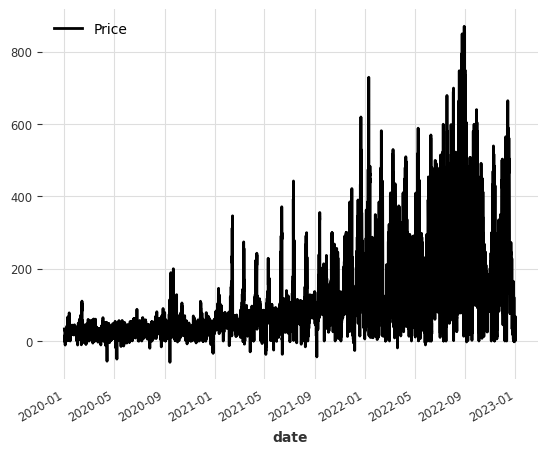

In [ ]:
time_series.plot()

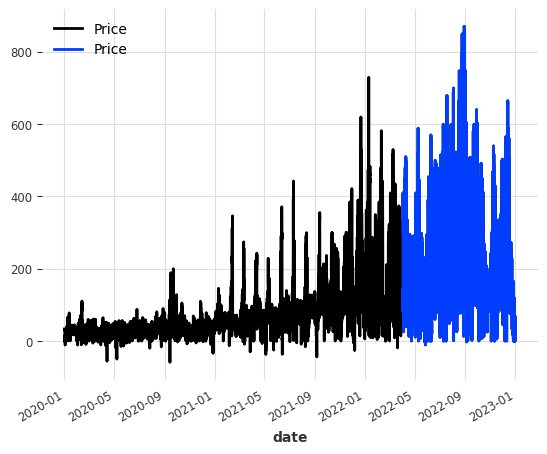

In [ ]:
time_series1, time_series2 = time_series.split_before(0.75)
time_series.plot()
time_series2.plot()

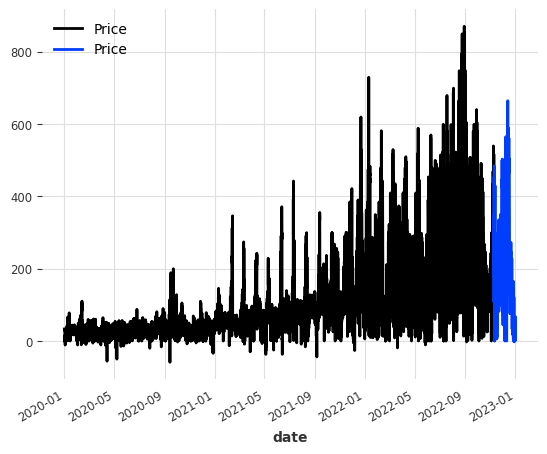

In [ ]:
time_series1, time_series2 = time_series[:-1250], time_series[-1250:]
time_series1.plot()
time_series2.plot()

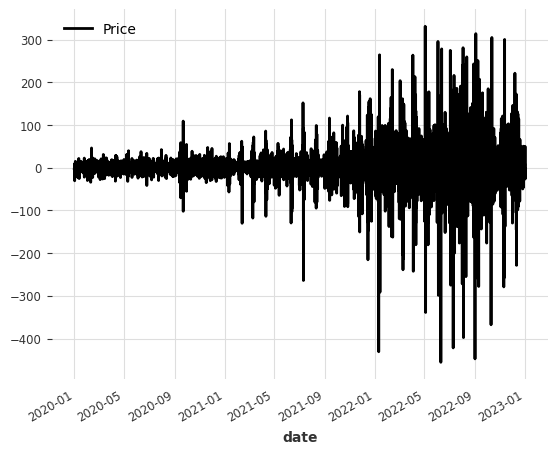

In [ ]:
time_series.diff().plot()

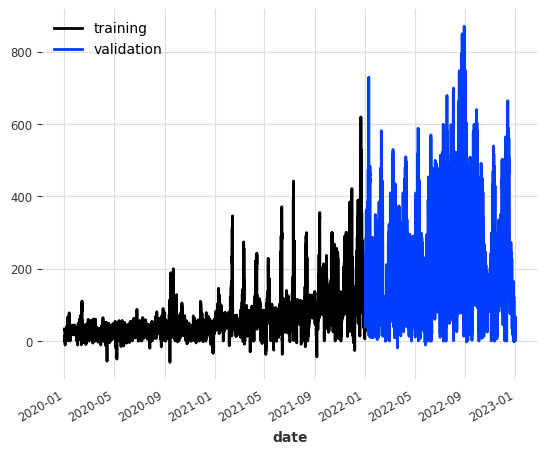

In [ ]:
# dart recommendation, but I think we will use random method
train, val = time_series.split_before(pd.Timestamp("01.01.2022 01:00"))
train.plot(label="training")
val.plot(label="validation")

## Creating a training and validation series

For what follows, we will split our TimeSeries into a training and a validation series. Note: in general, it is also a good practice to keep a test series aside and never touch it until the end of the process. Here, we just build a training and a validation series for simplicity.

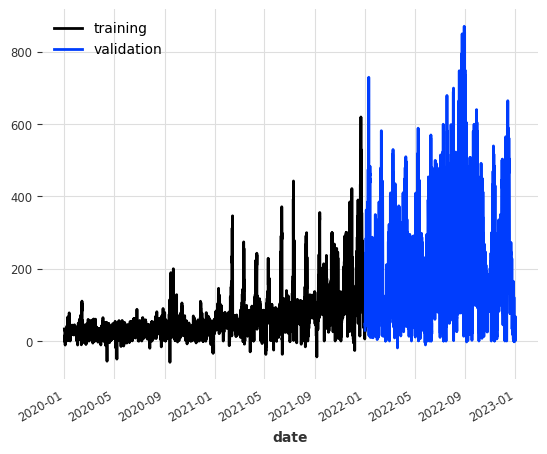

In [ ]:
# create a training and validation set
train, val = time_series.split_before(pd.Timestamp("31.12.2021 23:00"))
train.plot(label="training")
val.plot(label="validation")

## Training forecasting models and making predictions

## Inspect Seasonality

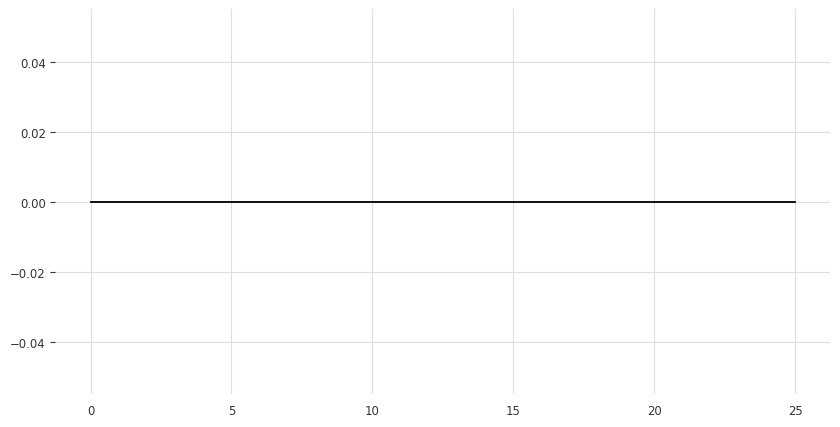

In [ ]:
# import
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=1, alpha=0.05)

Questions:

* If our training data relys on a period of time that was more stable, won't it perform poorly in the test data? Why don't we go further back in time?
* If we think that seasonality is a CORE in this project, we won't find any seasonality in 2021 and 2022, right? Also, we might consider look at daily mean prices.
* Then, is it aligned with the business proposal to predict daily mean prices? How can we create something valuable from here.

We should ask Roman these questions to follow the proper and more realistic path